In [129]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import cross_val_predict,train_test_split,RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from scipy.stats import randint

In [47]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: >

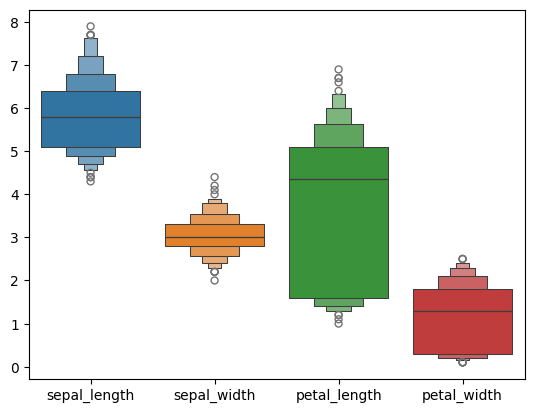

In [48]:
sns.boxenplot(df)

In [49]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


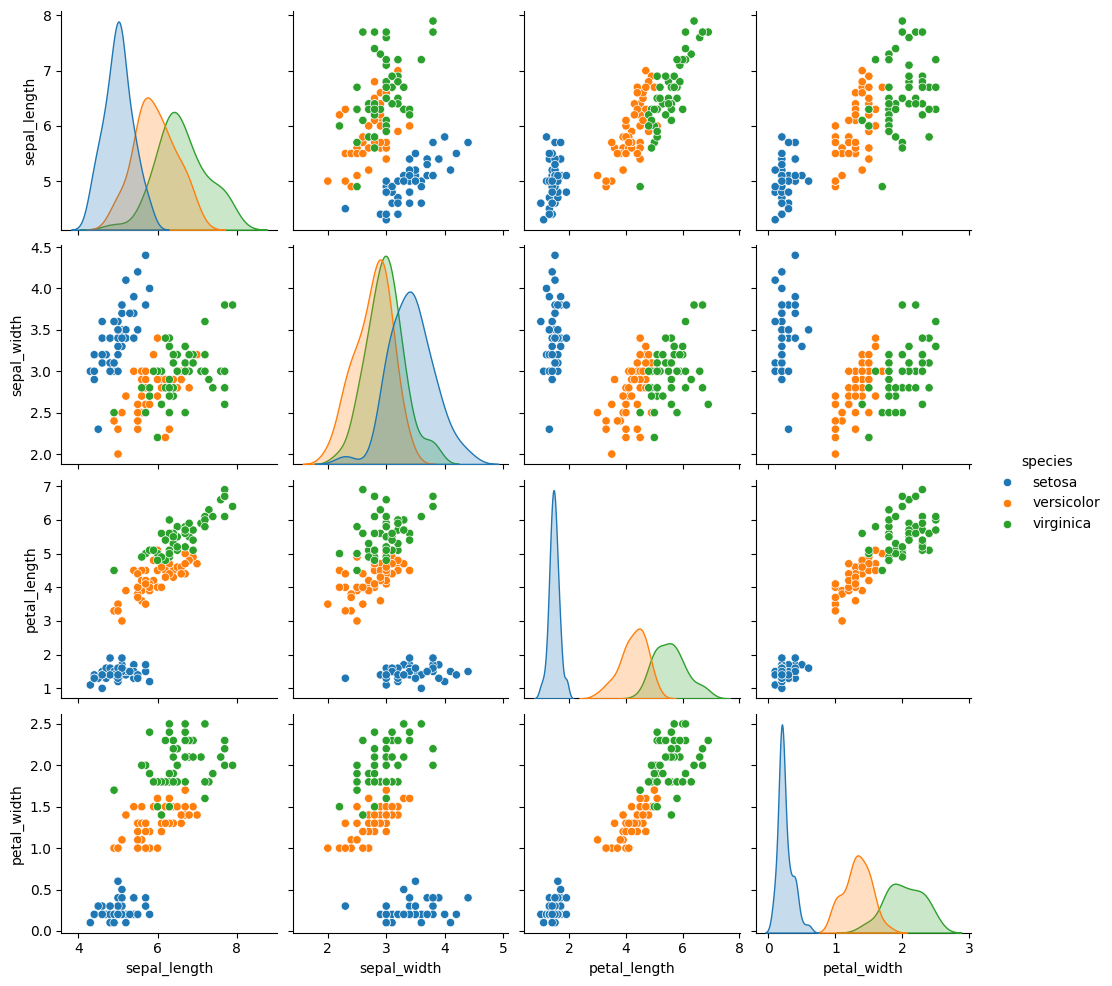

In [8]:
sns.pairplot(df,hue="species")

In [52]:
df['Petal_area']=df['petal_length']*df['petal_width']
df['Sepal_area']=df['sepal_length']*df['petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,species,Petal_area,Sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,1.02
1,4.9,3.0,1.4,0.2,setosa,0.28,0.98
2,4.7,3.2,1.3,0.2,setosa,0.26,0.94
3,4.6,3.1,1.5,0.2,setosa,0.30,0.92
4,5.0,3.6,1.4,0.2,setosa,0.28,1.00
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96,15.41
146,6.3,2.5,5.0,1.9,virginica,9.50,11.97
147,6.5,3.0,5.2,2.0,virginica,10.40,13.00
148,6.2,3.4,5.4,2.3,virginica,12.42,14.26


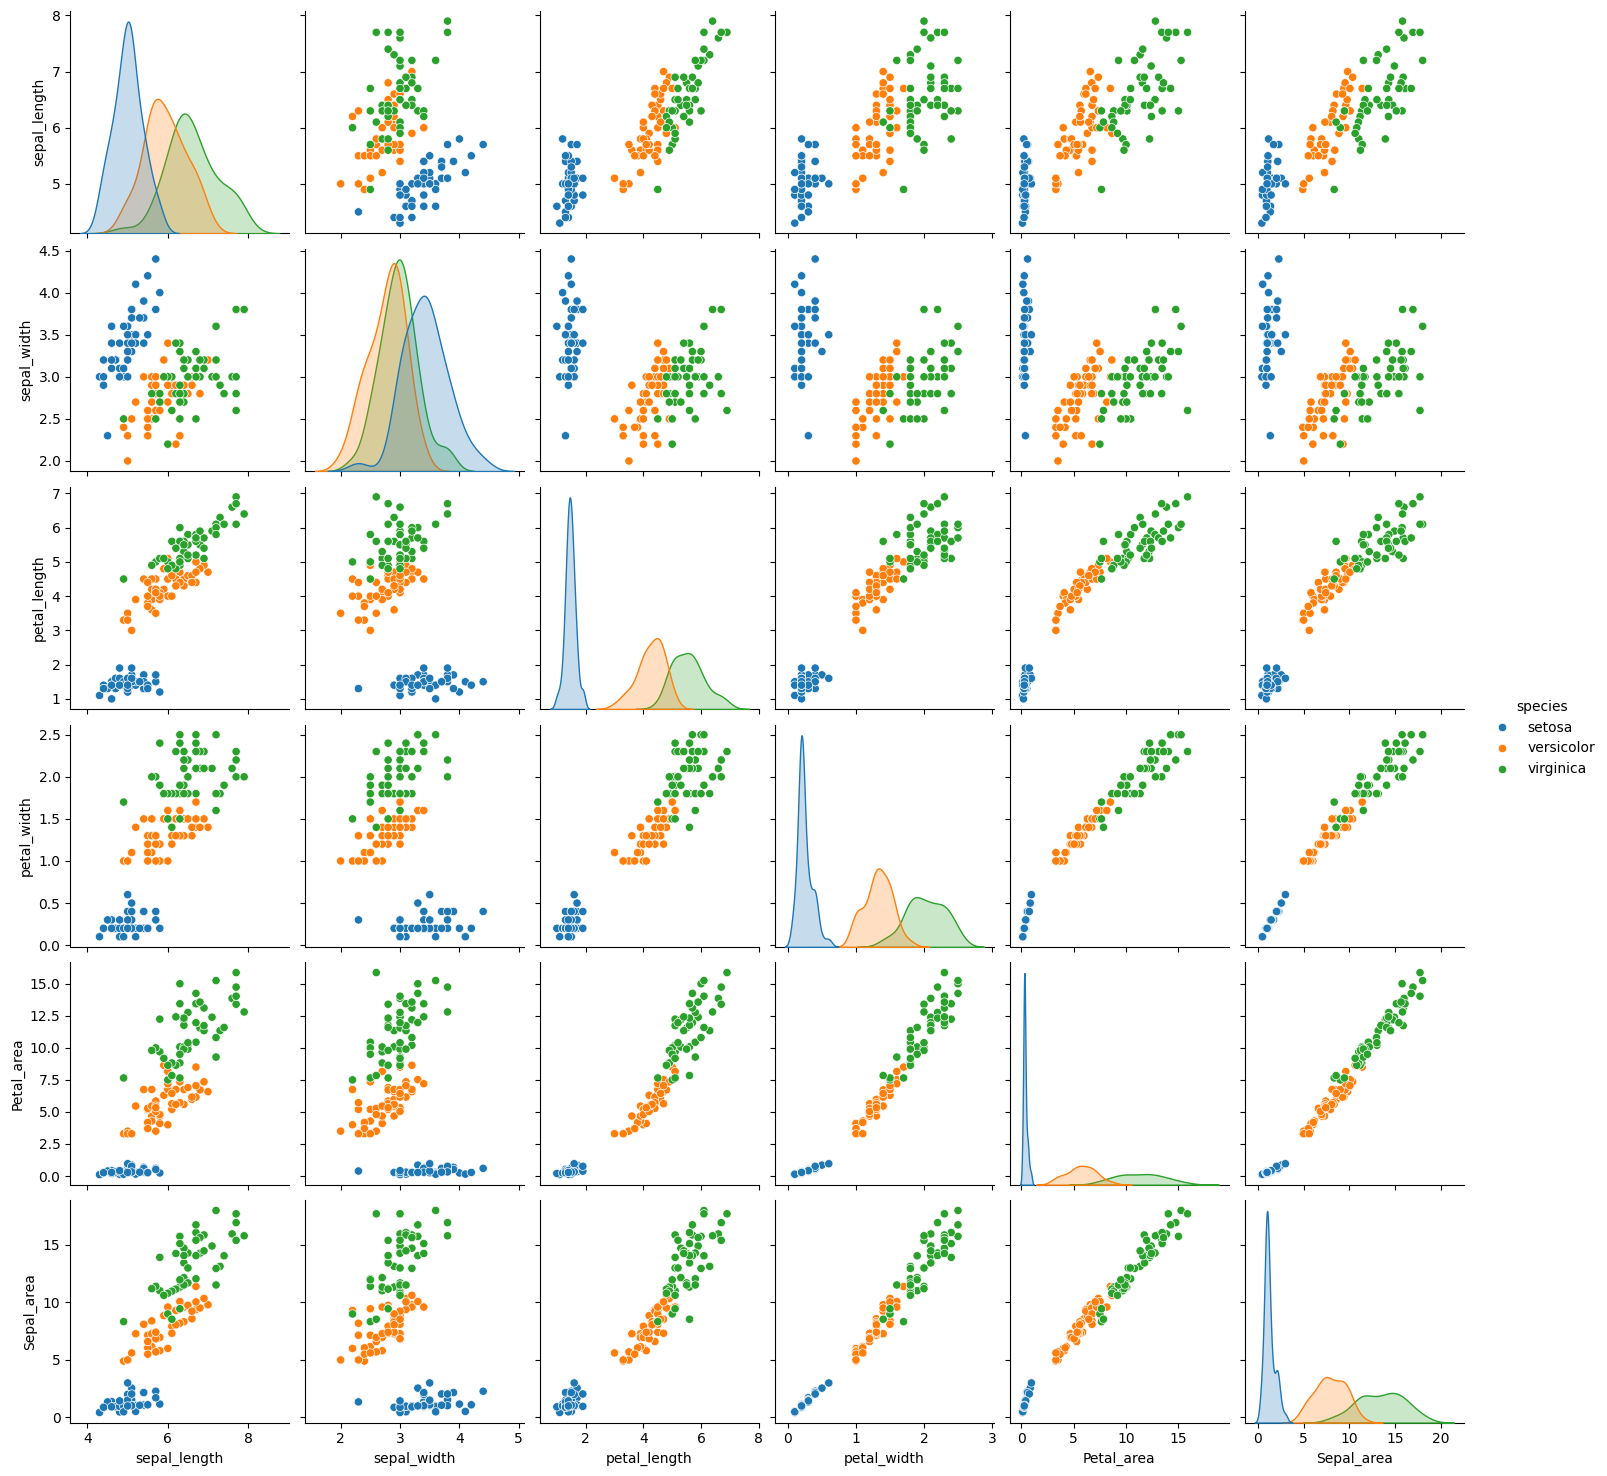

In [10]:
sns.pairplot(df,hue='species')

In [53]:
X=df
X

,sepal_length,sepal_width,petal_length,petal_width,species,Petal_area,Sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,1.02
1,4.9,3.0,1.4,0.2,setosa,0.28,0.98
2,4.7,3.2,1.3,0.2,setosa,0.26,0.94
3,4.6,3.1,1.5,0.2,setosa,0.30,0.92
4,5.0,3.6,1.4,0.2,setosa,0.28,1.00
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96,15.41
146,6.3,2.5,5.0,1.9,virginica,9.50,11.97
147,6.5,3.0,5.2,2.0,virginica,10.40,13.00
148,6.2,3.4,5.4,2.3,virginica,12.42,14.26


In [54]:
y=df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 149, dtype: object

In [55]:
X=X.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width,Petal_area,Sepal_area
0,5.1,3.5,1.4,0.2,0.28,1.02
1,4.9,3.0,1.4,0.2,0.28,0.98
2,4.7,3.2,1.3,0.2,0.26,0.94
3,4.6,3.1,1.5,0.2,0.30,0.92
4,5.0,3.6,1.4,0.2,0.28,1.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,11.96,15.41
146,6.3,2.5,5.0,1.9,9.50,11.97
147,6.5,3.0,5.2,2.0,10.40,13.00
148,6.2,3.4,5.4,2.3,12.42,14.26


In [69]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,Petal_area,Sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,1.02
1,4.9,3.0,1.4,0.2,setosa,0.28,0.98
2,4.7,3.2,1.3,0.2,setosa,0.26,0.94
3,4.6,3.1,1.5,0.2,setosa,0.30,0.92
4,5.0,3.6,1.4,0.2,setosa,0.28,1.00
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96,15.41
146,6.3,2.5,5.0,1.9,virginica,9.50,11.97
147,6.5,3.0,5.2,2.0,virginica,10.40,13.00
148,6.2,3.4,5.4,2.3,virginica,12.42,14.26


In [74]:
lab=LabelEncoder()
enc_cat=lab.fit_transform(df[['species']])

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
enc_cat=pd.DataFrame(enc_cat)
enc_cat = enc_cat.rename(columns={0: 'Target'})
enc_cat

,Target
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [72]:
enc=OneHotEncoder(drop='first',sparse_output=False)
encoded_cat=enc.fit_transform(df[['species']])
encoded_cat=pd.DataFrame(encoded_cat,columns=enc.get_feature_names_out())
encoded_cat

,species_versicolor,species_virginica
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
144,0.0,1.0
145,0.0,1.0
146,0.0,1.0
147,0.0,1.0


In [79]:
y=enc_cat
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [80]:
X

,sepal_length,sepal_width,petal_length,petal_width,Petal_area,Sepal_area
0,5.1,3.5,1.4,0.2,0.28,1.02
1,4.9,3.0,1.4,0.2,0.28,0.98
2,4.7,3.2,1.3,0.2,0.26,0.94
3,4.6,3.1,1.5,0.2,0.30,0.92
4,5.0,3.6,1.4,0.2,0.28,1.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,11.96,15.41
146,6.3,2.5,5.0,1.9,9.50,11.97
147,6.5,3.0,5.2,2.0,10.40,13.00
148,6.2,3.4,5.4,2.3,12.42,14.26


## Scaling and splitting

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
X_train

,sepal_length,sepal_width,petal_length,petal_width,Petal_area,Sepal_area
22,4.6,3.6,1.0,0.2,0.20,0.92
15,5.7,4.4,1.5,0.4,0.60,2.28
65,6.7,3.1,4.4,1.4,6.16,9.38
11,4.8,3.4,1.6,0.2,0.32,0.96
42,4.4,3.2,1.3,0.2,0.26,0.88
...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,5.20,7.93
106,4.9,2.5,4.5,1.7,7.65,8.33
14,5.8,4.0,1.2,0.2,0.24,1.16
92,5.8,2.6,4.0,1.2,4.80,6.96


In [114]:
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_train

array([[-1.47286067,  1.25077879, -1.55015743, -1.30727768, -1.18209368,
        -1.24721888],
       [-0.14230538,  3.0604162 , -1.26565907, -1.03952201, -1.09526222,
        -0.98324893],
       [ 1.06729034,  0.11975542,  0.38443139,  0.29925634,  0.11169518,
         0.3948295 ],
       [-1.23094153,  0.79836944, -1.2087594 , -1.30727768, -1.15604424,
        -1.23945506],
       [-1.71477982,  0.34596009, -1.37945841, -1.30727768, -1.16906896,
        -1.2549827 ],
       [ 2.15592649, -0.10644926,  1.63622416,  1.23640118,  1.78320094,
         1.67197824],
       [ 0.70441163,  0.34596009,  0.44133106,  0.43313417,  0.2397716 ,
         0.43753052],
       [-0.74710324,  1.02457412, -1.26565907, -1.30727768, -1.16038582,
        -1.22392741],
       [-0.98902238,  1.25077879, -1.32255874, -1.30727768, -1.16472739,
        -1.23169123],
       [-0.74710324,  2.38180217, -1.26565907, -1.44115551, -1.19294762,
        -1.3248571 ],
       [ 1.30920949,  0.34596009,  1.12412712,  1.

In [115]:
X_train=pd.DataFrame(X_train,columns=std_scaler.get_feature_names_out())
X_train

,sepal_length,sepal_width,petal_length,petal_width,Petal_area,Sepal_area
0,-1.472861,1.250779,-1.550157,-1.307278,-1.182094,-1.247219
1,-0.142305,3.060416,-1.265659,-1.039522,-1.095262,-0.983249
2,1.067290,0.119755,0.384431,0.299256,0.111695,0.394830
3,-1.230942,0.798369,-1.208759,-1.307278,-1.156044,-1.239455
4,-1.714780,0.345960,-1.379458,-1.307278,-1.169069,-1.254983
...,...,...,...,...,...,...
114,0.341533,-0.558859,0.156833,0.165379,-0.096700,0.113391
115,-1.109982,-1.237473,0.441331,0.700890,0.435142,0.191029
116,-0.021346,2.155597,-1.436358,-1.307278,-1.173411,-1.200636
117,-0.021346,-1.011268,0.156833,0.031501,-0.183532,-0.074882


In [116]:
X_test=std_scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=std_scaler.get_feature_names_out())
X_test

,sepal_length,sepal_width,petal_length,petal_width,Petal_area,Sepal_area
0,0.341533,-0.558859,0.555130,0.031501,-0.001186,-0.005007
1,-0.142305,1.703188,-1.151860,-1.173400,-1.114799,-1.093883
2,2.276886,1.703188,1.693124,1.370279,1.974230,1.862192
3,0.220573,-0.332654,0.441331,0.433134,0.239772,0.321073
4,1.188250,-0.558859,0.612030,0.299256,0.233259,0.422003
5,-0.505184,0.798369,-1.265659,-1.039522,-1.095262,-1.006540
6,-0.263265,-0.332654,-0.070766,0.165379,-0.209581,-0.012771
7,1.067290,0.119755,1.067227,1.638035,1.692028,1.695270
8,0.462492,-1.916087,0.441331,0.433134,0.239772,0.379302
9,-0.021346,-0.785063,0.099933,0.031501,-0.209581,-0.074882


## Random search

In [138]:
param_distributions={
    'n_estimators':randint(low=80,high=800),
    'max_features':randint(low=2,high=20),
    'max_depth':randint(low=10,high=110),
    'min_samples_split':randint(low=2,high=20),
    'min_samples_leaf':randint(low=1,high=20)
}
rf=RandomForestClassifier(random_state=42)
random_search=RandomizedSearchCV(
    param_distributions=param_distributions,
    estimator=rf,
    n_iter=100,
    cv=5,
    n_jobs=-2,
    verbose=1
)

In [139]:
random_search.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....001ED7015D710>, 'max_features': <scipy.stats....001ED70EBEC90>, 'min_samples_leaf': <scipy.stats....001ED709B3650>, 'min_samples_split': <scipy.stats....001ED709B0D90>, ...}"
,n_iter,100
,scoring,None
,n_jobs,-2
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [140]:
rf=random_search.best_estimator_
rf

,n_estimators,261
,criterion,'gini'
,max_depth,67
,min_samples_split,11
,min_samples_leaf,19
,min_weight_fraction_leaf,0.0
,max_features,9
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model testing

In [141]:
y_pred=cross_val_predict(rf,X,y,cv=5)
y_pred

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [142]:
cm=confusion_matrix(y_pred,y)
cm

array([[50,  0,  0],
       [ 0, 48,  3],
       [ 0,  2, 46]])

In [143]:
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        51
           2       0.94      0.96      0.95        48

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149



In [96]:
sgd=SGDClassifier()
y_pred=cross_val_predict(sgd,X,y,cv=5)
y_pred

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expec

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
cm=confusion_matrix(y_pred,y)
cm

array([[50,  0,  0],
       [ 0, 47,  4],
       [ 0,  3, 45]])

In [98]:
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        51
           2       0.92      0.94      0.93        48

    accuracy                           0.95       149
   macro avg       0.95      0.95      0.95       149
weighted avg       0.95      0.95      0.95       149



In [ ]:
svc=SVC()
y_pred=cross_val_predict(svc,X,y,cv=5)
y_pred

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expec

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0,
       0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 2])

In [ ]:
cm=confusion_matrix(y_pred,y)
cm

array([[40,  0,  0],
       [ 0, 38,  4],
       [ 0,  3, 34]])

In [ ]:
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.90      0.92        42
           2       0.89      0.92      0.91        37

    accuracy                           0.94       119
   macro avg       0.94      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119



## Results

Before standardization f1score
Random Forest=1, 0.96 and 0.96
SGD=1,0.93,0.93
SVC=1,0.94,0.94

random forest=1,0.93,0.92
SVC=1,0.92,0.91

standard scaling didnt help